The C/F splitting---i.e. the splitting of indices into strictly coarse nodes (C-pts) and strictly fine nodes (F-pts)---using Compatible Relaxation is illustrated in this example. A 2d finite-difference matrix of the Poisson problem is used and the coarse and fine splitting is plotted. Coarse nodes are highlighted orange, while fine nodes are highlighted blue. In this case, the coarsening is not aggressive, resulting in a coarsening-by-two.

In [1]:
import numpy as np
import pyamg
import matplotlib.pyplot as plt

In [2]:
n = 20
A = pyamg.gallery.poisson((n,n)).tocsr()

In [3]:
xx = np.linspace(0,1,n)
x,y = np.meshgrid(xx,xx)
V = np.concatenate([[x.ravel()],[y.ravel()]],axis=0).T

In [4]:
splitting = pyamg.classical.cr.CR(A)

In [5]:

C = np.where(splitting == 0)[0]
F = np.where(splitting == 1)[0]

Text(0, 0.5, '$y$')

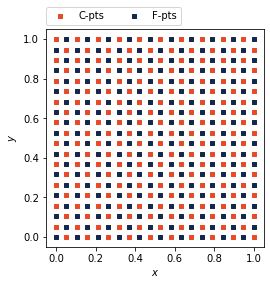

In [12]:
fig, ax = plt.subplots()
ax.scatter(V[C, 0], V[C, 1], marker='s', s=18,
           color=[232.0/255, 74.0/255, 39.0/255], label='C-pts')
ax.scatter(V[F, 0], V[F, 1], marker='s', s=18,
           color=[19.0/255, 41.0/255, 75.0/255], label='F-pts')
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
           borderaxespad=0, ncol=2)
ax.axis('square')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')